In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from IPython.display import Image

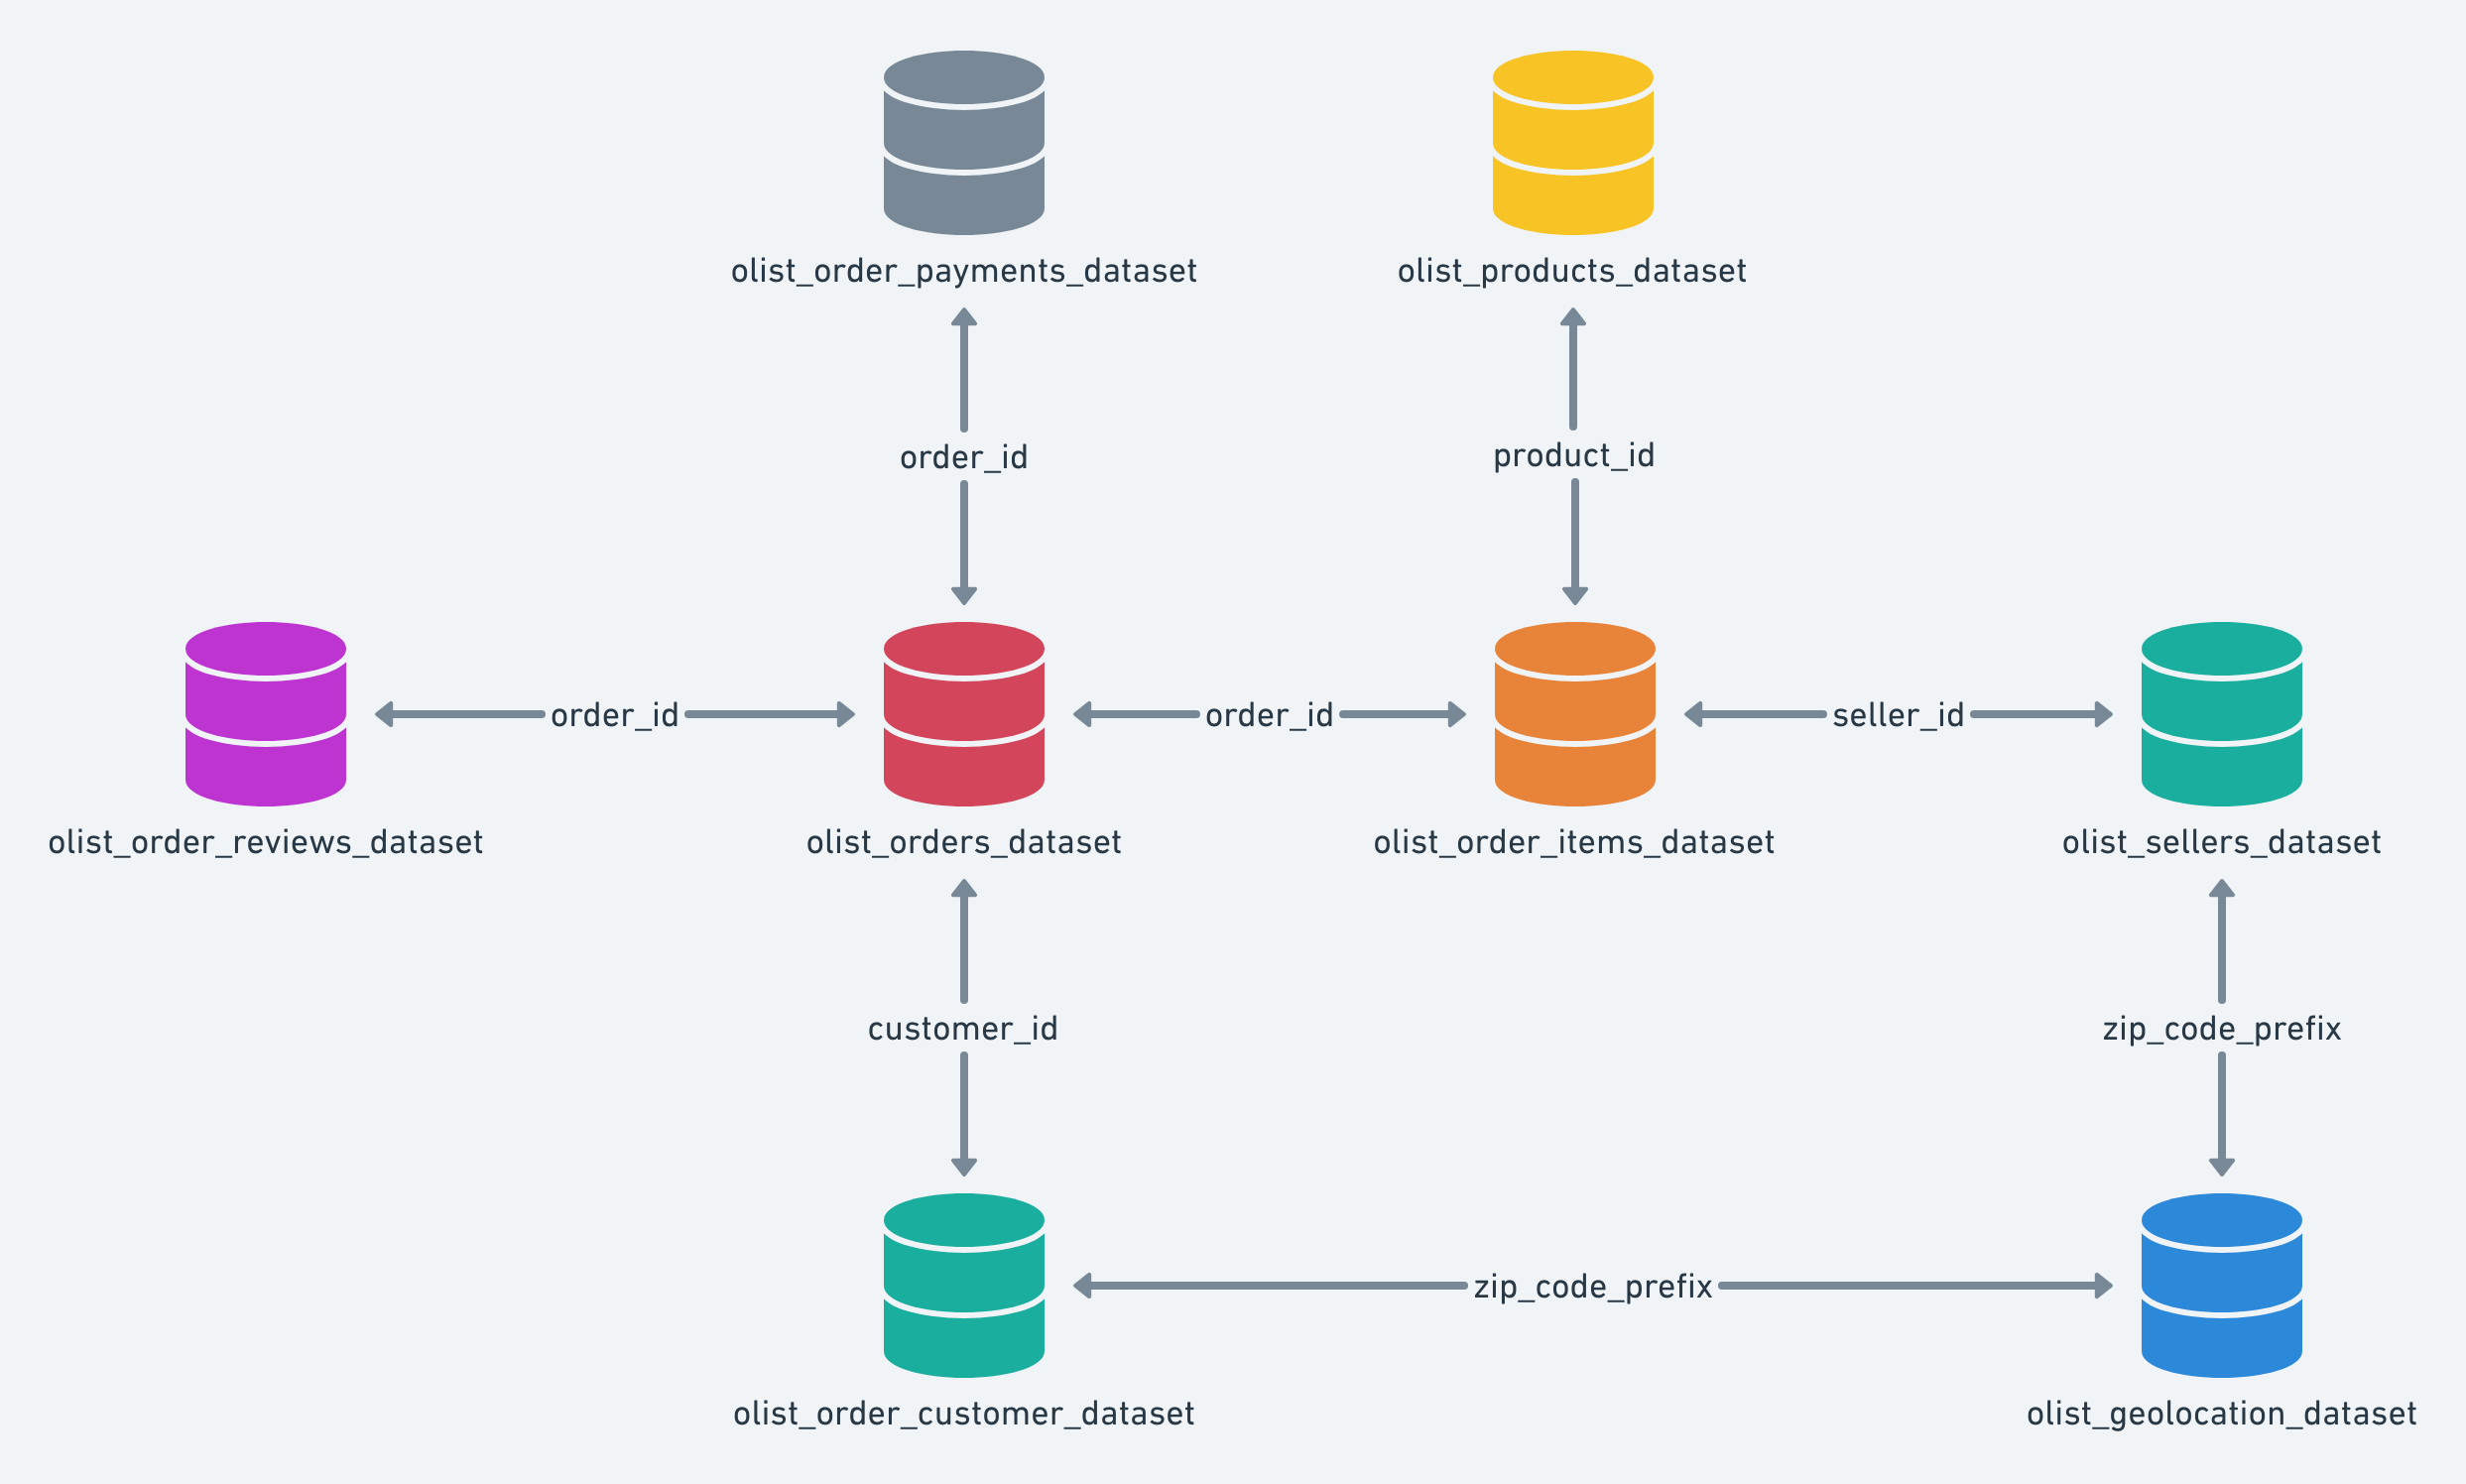

In [162]:
# Display the ER Diagram
Image(filename='ER Diagram.png')

In [163]:

master = pd.read_csv('input/master_table.csv')
customers = pd.read_csv('input/olist_customers_dataset.csv')
orders = pd.read_csv('input/olist_orders_dataset.csv')
payments = pd.read_csv('input/olist_order_payments_dataset.csv')
product = pd.read_csv('input/olist_products_dataset.csv')
product_category = pd.read_csv('input/product_category_name_translation.csv')
geo = pd.read_csv('input/olist_geolocation_dataset.csv')

In [164]:
review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [165]:
review_status = review.groupby('order_id')['review_score'].nunique().sort_values(ascending=False).head(10)

In [166]:
review_status 

order_id
d6dde74bdeb424af6b660214881b4845    2
4d006fbdecd41058974d5d99f2d69650    2
ac08c0b67890296c7c7c10f34b81eea4    2
46d2741b78a72c2f07bf0f3c34c4ceab    2
5642f00882c2ab59e001778dc483135f    2
75785442e7f4f3aee6dcdd92fd9328ba    2
66355bca3dfaa134e807687ade5d3330    2
b7293e3014a7261f0d26d28a1e927864    2
b5a801d2465c927e096449f176459916    2
2ce757e7e2cf3442241e4646b3472dd0    2
Name: review_score, dtype: int64

In [167]:
review_usual=review.groupby('review_score') .aggregate('count').reset_index()

In [168]:
review_usual

,review_score,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,1,11858,11858,1957,9179,11858,11858
1,2,3235,3235,494,2229,3235,3235
2,3,8287,8287,843,3665,8287,8287
3,4,19200,19200,1743,6034,19200,19200
4,5,57420,57420,6678,20646,57420,57420


In [169]:
order_product=pd.merge(product_category,product,on='product_category_name',how='inner')
order_product.head(10)

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0
2,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0
3,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0
4,beleza_saude,health_beauty,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,938.0,29.0,22.0,23.0
5,beleza_saude,health_beauty,3569d4374a919941a50f57371b1dc93d,37.0,1168.0,1.0,2700.0,21.0,16.0,31.0
6,beleza_saude,health_beauty,3a6a0247ced9dcb444b46caafdcdd368,60.0,2497.0,1.0,3600.0,20.0,20.0,20.0
7,beleza_saude,health_beauty,adf591c625cb265c12bc6749d3a2f757,60.0,1146.0,6.0,150.0,20.0,24.0,33.0
8,beleza_saude,health_beauty,50556c630443502c11acde1c320fe278,59.0,257.0,1.0,250.0,16.0,2.0,20.0
9,beleza_saude,health_beauty,88d2c501ec765f5d7e8038fa6aab0e62,51.0,863.0,1.0,10700.0,40.0,40.0,40.0


In [170]:
order_products=pd.merge(order_product,order_items,on='product_id',how='left')
order_products.head(10)

,product_category_name,product_category_name_english,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
0,beleza_saude,health_beauty,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,75.0,21.0,7.0,13.0,a41753c6a1d8accb89732e36243432d7,1,94144541854e298c2d976cb893b81343,2017-05-18 11:05:13,29.9,15.79
1,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2018-03-12 18:30:16,95.9,27.22
2,beleza_saude,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,1300.0,19.0,28.0,17.0,f6fbf7907913892ffc12ada3bff286ba,1,abcd2cb37d46c2c8fb1bf071c859fc5b,2017-08-04 19:03:15,89.9,38.18
3,beleza_saude,health_beauty,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,1467.0,23.0,16.0,20.0,a63144d37a00c28ef382668a5d5ece8b,1,851773c885feb5e2da3b4f82bc2b17ce,2018-02-14 14:31:45,29.9,16.11
4,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,3ea7135b7064169abacfc10aa72f2e3a,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-14 13:35:14,64.9,19.64
5,beleza_saude,health_beauty,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,1050.0,18.0,21.0,27.0,93d7cfb112111edec49fd02555f48da3,1,01fdefa7697d26ad920e9e0346d4bd1b,2018-08-20 03:15:16,64.9,19.64
6,beleza_saude,health_beauty,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,938.0,29.0,22.0,23.0,396b08e638fbc9a9d6747df738dbd29c,1,40d54b51e962dbe09cabbcfd33298dee,2018-04-10 17:30:22,255.0,15.88
7,beleza_saude,health_beauty,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,938.0,29.0,22.0,23.0,d9f834b712ac280bbbbcd7a3114c240c,1,40d54b51e962dbe09cabbcfd33298dee,2017-12-11 17:31:10,255.0,12.99
8,beleza_saude,health_beauty,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,938.0,29.0,22.0,23.0,dd8c2ff157394afacbcc50a161e1af4e,1,40d54b51e962dbe09cabbcfd33298dee,2017-07-20 09:35:11,253.0,19.02
9,beleza_saude,health_beauty,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,938.0,29.0,22.0,23.0,f409f5ae35c08a9135d9e5d15ec6ab67,1,40d54b51e962dbe09cabbcfd33298dee,2017-07-14 11:10:10,219.9,12.74


In [171]:
most_product=order_products.groupby('product_category_name_english').aggregate({'order_id':'count'}).rename(columns={'order_id':'order_count'}).sort_values(by='order_count',ascending=False).reset_index()
most_product.head()

,product_category_name_english,order_count
0,bed_bath_table,11115
1,health_beauty,9670
2,sports_leisure,8641
3,furniture_decor,8334
4,computers_accessories,7827


In [173]:
linear_model = smf.ols(formula = 'freight_value ~ price', data = order_products)
fitted_model = linear_model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          freight_value   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                 2.302e+04
Date:                Sun, 08 Dec 2019   Prob (F-statistic):               0.00
Time:                        19:53:40   Log-Likelihood:            -4.5379e+05
No. Observations:              111023   AIC:                         9.076e+05
Df Residuals:                  111021   BIC:                         9.076e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.7026      0.052    303.089      0.000      15.601      15.804
price          0.0358      0.000    151.713      0.000       0.035       0.036
==============================================================================
Omnibus:                   115091.671   Durbin-Watson:                   1.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14483326.242
Skew:                           4.966   Prob(JB):                         0.00
Kurtosis:                      58.066   Cond. No.                         263.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [176]:
master.head(3)

,Month,Year,Customer City,Customer State,Customer Unique Id,Customer Zip Code Prefix,Customerid,Freight Value,Lat,Long,...,Payment Type,Payment Value,Price,Product Category Name,Product Category Name English,Product Id,Purchase Date,Ranked,Sellerid,Shipping Date
0,May,2018,sao paulo,SP,0c1a20644f0dc126c3eaff8dbc1bd12c,1003,7ae2a9337aa4bc799723511faa1d6830,8.98,-23.548988,-46.635786,...,credit_card,98.97,89.99,brinquedos,toys,83d199d296c44101c8c3b5c9c0cce9ea,5/10/18,1.0,850f4f8af5ea87287ac68de36e29107f,5/16/18
1,June,2018,sao paulo,SP,968f6d2f674977d88a4b445a5117ccd8,1004,a09edf8c1e842e94805a206b3d73eed5,7.95,-23.549813,-46.634773,...,credit_card,106.95,99.00,papelaria,stationery,e5de2225ad9ea5307da42efd7fe437f6,6/13/18,1.0,fd386aa7bed2af3c7035c65506c9b4a3,6/15/18
2,April,2017,sao paulo,SP,095e7c124c5c1ccb1eb9f731152eae6a,1004,ee9b73e88afb4904ee2322cfc89cf638,11.17,-23.549813,-46.634773,...,credit_card,91.16,79.99,perfumaria,perfumery,dd61e943598eec72351633dd6a72d5dc,4/16/17,1.0,cc419e0650a3c5ba77189a1882b7556a,4/24/17


In [180]:
trans_city=pd.DataFrame(master.groupby('Customer State').agg({'Payment Value':'mean'}).rename(columns={'Payment Value':'avg_trans'}).sort_values(by='avg_trans',ascending=False)).reset_index()

In [181]:
trans_city

,Customer State,avg_trans
0,PB,282.459348
1,AC,267.285161
2,AP,257.651190
3,AL,243.599075
4,RR,243.207800
5,PI,240.178039
6,MA,235.898487
7,RO,232.025214
8,MT,229.607880
9,PA,228.681333


There are 71 unique cities in the database. The TOP 10 cities are:
Product Category Name English
health_beauty            1263
sports_leisure           1139
housewares               1110
computers_accessories    1003
bed_bath_table            871
auto                      869
watches_gifts             863
furniture_decor           788
toys                      650
garden_tools              623
Name: Price, dtype: int64

TOP 10 cities covers 9.2 percent of all the orders.


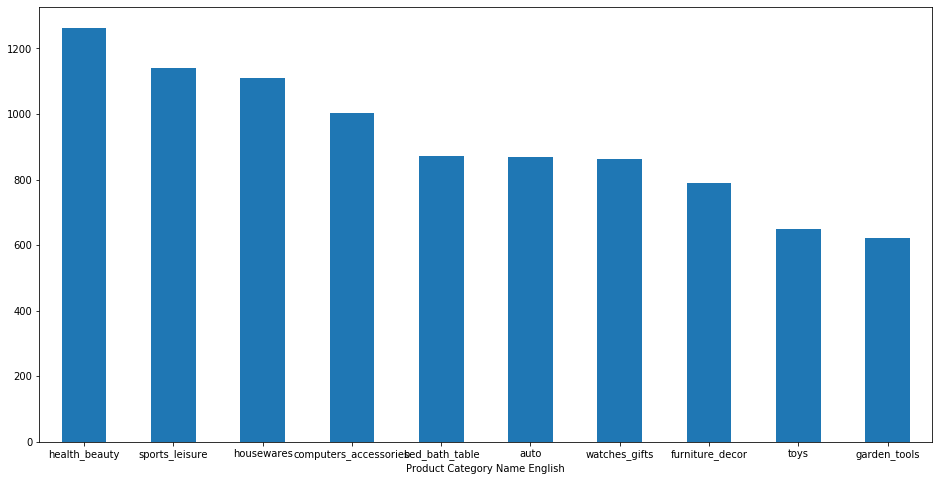

In [179]:
cities = master["Product Category Name English"].nunique()
c1 = master.groupby('Product Category Name English')['Price'].nunique().sort_values(ascending=False)
print("There are",cities,"unique cities in the database. The TOP 10 cities are:")
c2 = c1.head(10)
print(c2)
print("\nTOP 10 cities covers", round(c2.sum()/customers.shape[0]*100,1),"percent of all the orders.")
plt.figure(figsize=(16,8))
c2.plot(kind="bar",rot=0)

In [ ]:
plt.figure(figsize=(10,7))
ax=sns.barplot(x='customer_state',y='avg_trans',data=master,palette=sns.color_palette(palette="viridis_r"))
ax.set_xlabel('Customer State')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel('Avg transaction value')
ax.set_title("Average Transaction Value for each state")


In [94]:
linear_model = smf.ols(formula = 'Price ~ Year', data = master)
fitted_model = linear_model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5551
Date:                Sat, 07 Dec 2019   Prob (F-statistic):              0.456
Time:                        09:09:18   Log-Likelihood:            -7.6929e+05
No. Observations:              115948   AIC:                         1.539e+06
Df Residuals:                  115946   BIC:                         1.539e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1730.8812   2160.835      0.801      0.423   -2504.322    5966.084
Year          -0.7980      1.071     -0.745      0.456      -2.897       1.301
==============================================================================
Omnibus:                   159572.649   Durbin-Watson:                   1.470
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         69256926.902
Skew:                           7.855   Prob(JB):                         0.00
Kurtosis:                     121.695   Cond. No.                     8.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
data_month_order.head()

,customer_unique_id,date_first_order,year_first_order,month_first_order,total_orders_first_6_months,total_paid_first_6_months
0,0000366f3b9a7992bf8c76cfdf3221e2,5/10/18 10:56,2018,5,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,5/7/18 11:11,2018,5,1,27.19
2,0000f46a3911fa3c0805444483337064,3/10/17 21:05,2017,3,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,10/12/17 20:29,2017,10,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,11/14/17 19:45,2017,11,1,196.89


In [158]:
linear_model = smf.ols(formula = 'total_paid_first_6_months ~ year_first_order', data = data_month_order)
fitted_model = linear_model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     total_paid_first_6_months   R-squared:                       0.000
Model:                                   OLS   Adj. R-squared:                  0.000
Method:                        Least Squares   F-statistic:                     1.589
Date:                       Sat, 07 Dec 2019   Prob (F-statistic):              0.207
Time:                               10:41:01   Log-Likelihood:            -6.5922e+05
No. Observations:                      96095   AIC:                         1.318e+06
Df Residuals:                          96093   BIC:                         1.318e+06
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3911.5297   2971.738      1.316      0.188   -1913.043    9736.103
year_first_order    -1.8566      1.473     -1.260      0.207      -4.744       1.030
==============================================================================
Omnibus:                   149811.542   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        244529066.387
Skew:                           9.541   Prob(JB):                         0.00
Kurtosis:                     249.389   Cond. No.                     8.06e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
cities = customers["customer_city"].nunique()
c1 = customers.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)
print("There are",cities,"unique cities in the database. The TOP 10 cities are:")
c2 = c1.head(10)
print(c2)
print("\nTOP 10 cities covers", round(c2.sum()/customers.shape[0]*100,1),"percent of all the orders.")
plt.figure(figsize=(16,8))
c2.plot(kind="bar",rot=0)

In [98]:
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [99]:
status2=payments.groupby('order_id')['payment_value'].nunique().sort_values(ascending=False).head(10)

In [100]:
status2

order_id
fa65dad1b0e818e3ccc5cb0e39231352    25
ccf804e764ed5650cd8759557269dc13    22
285c2e15bebd4ac83635ccc563dc71f4    19
fedcd9f7ccdc8cba3a18defedd1a5547    17
ee9ca989fc93ba09a6eddc250ce01742    17
3c58bffb70dcf45f12bdf66a3c215905    12
c6492b842ac190db807c15aff21a7dd6    12
465c2e1bee4561cb39e0db8c5993aafc    12
21577126c19bf11a0b91592e5844ba78    12
73df5d6adbeea12c8ae03df93f346e86    12
Name: payment_value, dtype: int64

In [101]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [102]:
order_usual=orders.groupby('order_id')['order_items_qty'].aggregate('sum').reset_index()
order_usual=orders_usual['order_items_qty'].value_counts()
order_usual.head()

KeyError: 'Column not found: order_items_qty'

In [104]:
order_product=pd.merge(orders,product,on='product_category_name',how='left')
order_product.shape

KeyError: 'product_category_name'

In [55]:
product.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [56]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


There are 4119 unique cities in the database. The TOP 10 cities are:
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_id, dtype: int64

TOP 10 cities covers 35.2 percent of all the orders.


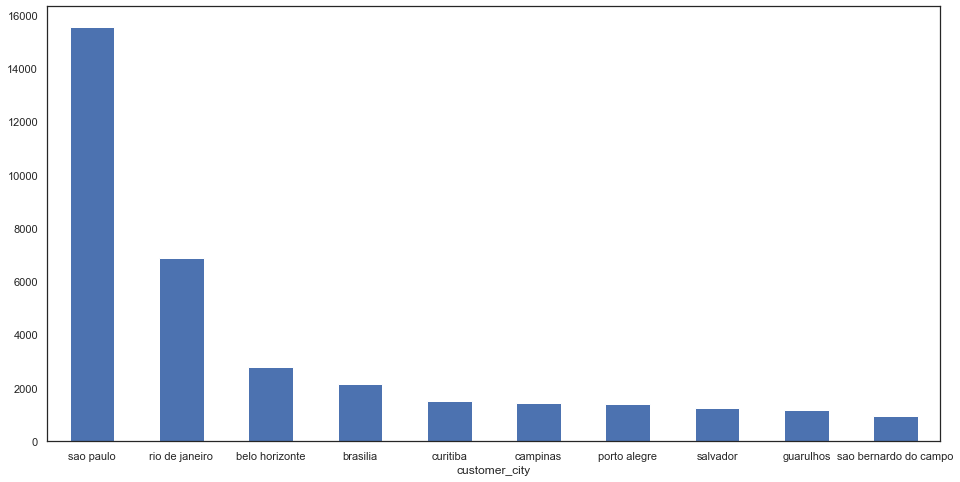

In [100]:
cities = customers["customer_city"].nunique()
c1 = customers.groupby('customer_city')['customer_id'].nunique().sort_values(ascending=False)
print("There are",cities,"unique cities in the database. The TOP 10 cities are:")
c2 = c1.head(10)
print(c2)
print("\nTOP 10 cities covers", round(c2.sum()/customers.shape[0]*100,1),"percent of all the orders.")
plt.figure(figsize=(16,8))
c2.plot(kind="bar",rot=0)

In [50]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [117]:
order_pay=pd.merge(orders,payments,how="left",on=['order_id','order_id']).head(10)

In [118]:
order_pay

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00,1.0,credit_card,6.0,175.26
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00,1.0,credit_card,1.0,65.95
9,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00,1.0,credit_card,3.0,75.16


In [147]:
product_1.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [62]:
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [57]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [59]:
print("Total number of orders in the database:",orders['order_id'].nunique())
print("Total Number of customers:",orders['customer_id'].nunique())

Total number of orders in the database: 99441
Total Number of customers: 99441


In [60]:
status=orders.groupby('order_status')['order_id'].nunique().sort_values(ascending=False)


In [61]:
status

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

In [63]:
value = orders.groupby('order_id')['order_products_value','order_freight_value'].sum().sort_values(by='order_products_value',ascending=False).reset_index()


KeyError: "Columns not found: 'order_freight_value', 'order_products_value'"

In [ ]:
##total=orders.groupby('product_category_name_english').aggregate({'order_id':'count'}).rename(columns={'order_id':'order_count'}).sort_values(by='order_count',ascending=False).reset_index()
##total.head()

In [51]:
payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


In [10]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
linear_model = smf.ols(formula = 'total ~ order_status + month_order + year_order + payment_sequential + payment_installments + payment_type), data = order_pay)
fitted_model = linear_model.fit()
fitted_model.summary()

In [101]:
payments["payment_value"].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

Text(0, 0.5, '')

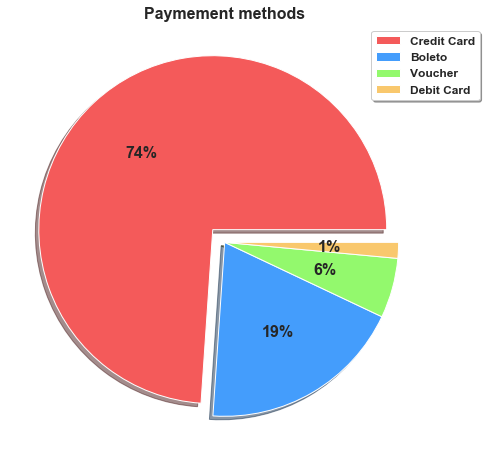

In [102]:
fig, ax = plt.subplots(figsize=(9, 8), subplot_kw=dict(aspect="equal"))
explode = (0.1, 0, 0, 0)
colors = ['#f45a5a', '#449dfc', '#93f96d', '#f9c86d']
legend = ["Credit Card", "Boleto", "Voucher", "Debit Card"]

p = payments["payment_type"][payments["payment_type"] != "not_defined"].value_counts()
p.plot(kind="pie", legend=False, labels=None, startangle=0, explode=explode, autopct='%1.0f%%', pctdistance=0.6, shadow=True, textprops={'weight':'bold', 'fontsize':16}, 
       colors=colors, ax=ax)
ax.legend(legend, loc='best', shadow=True, prop={'weight':'bold', 'size':12}, bbox_to_anchor=(0.6, 0, 0.5,1))
plt.title("Paymement methods", fontweight='bold', size=16)
plt.ylabel("")


In [11]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [12]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [13]:
payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [14]:
customers.shape

(99441, 5)

In [15]:
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [16]:
print("Customers database contains", customers.shape[0], "rows and", customers.shape[1], "columns.")

Customers database contains 99441 rows and 5 columns.


In [17]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [105]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


In [18]:
cust = customers["customer_unique_id"].nunique()
print("Number of unique customers:",cust)

Number of unique customers: 96096


In [19]:
custOrdPay_df = customers.merge(orders,on='customer_id').merge(payments,on='order_id')[['customer_unique_id','order_purchase_timestamp','payment_value']]

In [20]:
custOrdPay_df.shape

(103886, 3)

In [21]:
custOrdPay_df.head()

,customer_unique_id,order_purchase_timestamp,payment_value
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,146.87
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,157.73
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,173.30
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,252.25


In [22]:
custOrdPay_df.groupby(['customer_unique_id']).size().to_frame('size').reset_index().sort_values(['size'], ascending=[False])

,customer_unique_id,size
58029,9a736b248f67d166d2fbb006bcb877c3,33
52174,8af7ac63b2efbcbd88e5b11505e8098a,29
32600,569aa12b73b5f7edeaa6f2a01603e381,26
93769,f9ae226291893fda10af7965268fb7f6,23
14015,2524dcec233c3766f2c2b22f69fd65f4,22
42022,6fbc7cdadbb522125f4b27ae9dee4060,19
13931,24f12460aad399ba18f4ed2c2fbab65d,19
52972,8d50f5eadf50201ccdcedfb9e2ac8455,17
11019,1d2435aa3b858d45c707c9fc25e18779,16
14223,25ba76039a1caff121dfcb0d66e54780,15


In [23]:
custOrdPay_df[custOrdPay_df.customer_unique_id == '569aa12b73b5f7edeaa6f2a01603e381'].groupby('customer_unique_id').filter(lambda g: len(g) > 20).groupby('customer_unique_id').size().sort_values(ascending=False)

customer_unique_id
569aa12b73b5f7edeaa6f2a01603e381    26
dtype: int64

In [24]:
custOrdPay_df.head()

,customer_unique_id,order_purchase_timestamp,payment_value
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,146.87
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,157.73
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,173.30
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,252.25


In [25]:
# We also need to convert datetime features to the correct format
custOrdPay_df.order_purchase_timestamp = pd.to_datetime(custOrdPay_df.order_purchase_timestamp)

In [26]:
custOrdPay_df

,customer_unique_id,order_purchase_timestamp,payment_value
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,146.87
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,335.48
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,157.73
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,173.30
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,252.25
5,4c93744516667ad3b8f1fb645a3116a4,2017-09-14 18:14:31,282.21
6,addec96d2e059c80c30fe6871d30d177,2018-02-19 14:38:35,22.77
7,57b2a98a409812fe9618067b6b8ebe4f,2017-11-16 19:29:02,36.01
8,1175e95fb47ddff9de6b2b06188f7e0d,2018-01-18 12:35:44,39.10
9,9afe194fb833f79e300e37e580171f22,2018-01-08 11:22:34,122.47


In [103]:
custOrdPay_df.min()

customer_unique_id          0000366f3b9a7992bf8c76cfdf3221e2
order_purchase_timestamp                 2016-09-04 21:15:19
payment_value                                              0
order_purchase_date                      2016-09-04 00:00:00
order_purchase_year                                     2016
order_purchase_month                                       1
dtype: object

In [104]:
custOrdPay_df.max()

customer_unique_id          ffffd2657e2aad2907e67c3e9daecbeb
order_purchase_timestamp                 2018-10-17 17:30:18
payment_value                                        13664.1
order_purchase_date                      2018-10-17 00:00:00
order_purchase_year                                     2018
order_purchase_month                                      12
dtype: object

In [35]:
# creating a purchase date feature
custOrdPay_df['order_purchase_date'] = custOrdPay_df.order_purchase_timestamp.dt.date
custOrdPay_df['order_purchase_date'] = pd.to_datetime(custOrdPay_df['order_purchase_date'])

In [28]:
custOrdPay_df.head()

,customer_unique_id,order_purchase_timestamp,payment_value,order_purchase_date
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,146.87,2017-05-16
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,335.48,2018-01-12
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,157.73,2018-05-19
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,173.30,2018-03-13
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,252.25,2018-07-29


In [37]:
custOrdPay_df.head()

,customer_unique_id,order_purchase_timestamp,payment_value,order_purchase_date
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,146.87,2017-05-16
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,335.48,2018-01-12
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,157.73,2018-05-19
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 16:06:38,173.30,2018-03-13
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 09:51:30,252.25,2018-07-29


In [38]:
custOrdPay_df.info()
display(custOrdPay_df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 4 columns):
customer_unique_id          103886 non-null object
order_purchase_timestamp    103886 non-null datetime64[ns]
payment_value               103886 non-null float64
order_purchase_date         103886 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 3.2+ MB


,customer_unique_id,order_purchase_timestamp,payment_value,order_purchase_date
78060,25f7febd13455327260856a1039ba478,2017-10-19 14:11:44,112.95,2017-10-19
46726,8f191959b1fa8a6ecf78f9a324aa7d3e,2017-05-28 17:17:51,20.28,2017-05-28
60462,4b7a71c96db21017913cfee51622f797,2017-07-30 21:04:22,113.98,2017-07-30
39907,5e0ab408941a219fe6ec4bc43dbf680e,2017-09-19 18:46:41,66.63,2017-09-19
57601,b0e0c6d79137b2840d5c896244cd2668,2017-12-10 22:51:36,9.46,2017-12-10


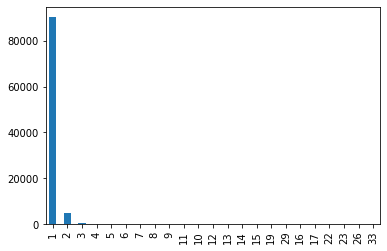

In [39]:
v = custOrdPay_df.customer_unique_id.value_counts()
pd.value_counts(v).plot(kind="bar")

2017-11-24    1214
2017-11-25     538
2017-11-27     420
Name: order_purchase_date, dtype: int64

In [42]:
custOrdPay_df.describe()

,payment_value
count,103886.000000
mean,154.100380
std,217.494064
min,0.000000
25%,56.790000
50%,100.000000
75%,171.837500
max,13664.080000


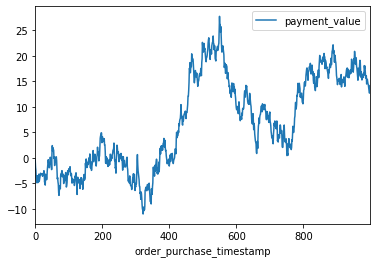

In [59]:
custPay_df = pd.DataFrame(np.random.randn(1000, 2), columns=['payment_value', 'customer_unique_id']).cumsum()

custPay_df['order_purchase_timestamp'] = pd.Series(list(range(len(custPay_df))))

custPay_df.plot(x='order_purchase_timestamp', y='payment_value')

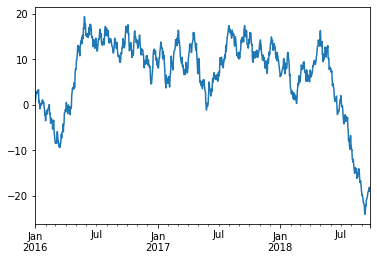

In [55]:
custPay_df = pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2016', periods=1000)).cumsum()

custPay_df.plot()

In [76]:
date = custOrdPay_df.order_purchase_timestamp.dt.date
date = pd.to_datetime(dateTime)

In [82]:
# Lets extract month and year from purchase date
custOrdPay_df['order_purchase_year'] = pd.DatetimeIndex(custOrdPay_df['order_purchase_date']).year
custOrdPay_df['order_purchase_month'] = pd.DatetimeIndex(custOrdPay_df['order_purchase_date']).month

In [87]:
custOrdPay_df.head(3)

,customer_unique_id,order_purchase_timestamp,payment_value,order_purchase_date,order_purchase_year,order_purchase_month
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,146.87,2017-05-16,2017,5
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:48:24,335.48,2018-01-12,2018,1
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-19 16:07:45,157.73,2018-05-19,2018,5


In [154]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [156]:
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [160]:
product_1.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [162]:
order_products=pd.merge(product,product_1,how="inner",on=['product_category_name','product_category_name']).head(10)

In [163]:
order_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
5,828fe032935d7c1901682e5b6cc076c2,perfumaria,48.0,1063.0,2.0,600.0,20.0,20.0,20.0,perfumery
6,bbaef2eadf31fe3ea6702077398be06c,perfumaria,45.0,1003.0,2.0,400.0,18.0,11.0,11.0,perfumery
7,cd7701670288642f7be9437dec9034c1,perfumaria,48.0,606.0,2.0,400.0,16.0,20.0,15.0,perfumery
8,dc582e9ac5036846acfeeb3093b17aa7,perfumaria,50.0,749.0,1.0,1300.0,22.0,14.0,14.0,perfumery
9,1f64ec386a6be322e71596931f5d2377,perfumaria,46.0,499.0,1.0,200.0,16.0,22.0,11.0,perfumery


In [ ]:
linear_model = smf.ols(formula = 'payment_value ~ order_purchase_month + month_order + year_order + payment_sequential + payment_installments + payment_type), data = order_pay)
fitted_model = linear_model.fit()
fitted_model.summary()

In [89]:
customers_by_month_year = custOrdPay_df.groupby(['order_purchase_year','order_purchase_month']).count().customer_unique_id
customers_by_month_year

order_purchase_year  order_purchase_month
2016                 9                          3
                     10                       342
                     12                         1
2017                 1                        850
                     2                       1886
                     3                       2837
                     4                       2571
                     5                       3944
                     6                       3436
                     7                       4317
                     8                       4550
                     9                       4516
                     10                      4860
                     11                      7863
                     12                      5895
2018                 1                       7563
                     2                       6952
                     3                       7512
                     4                       7209
        

Text(0.5, 1.0, 'Customers Purchase by Year and Month')

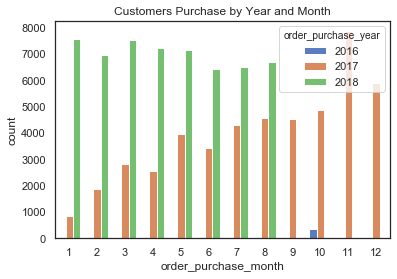

In [98]:
sns.set(style="white")
ax = sns.countplot(x="order_purchase_month", hue = "order_purchase_year", data=custOrdPay_df, palette = "muted")
ax.set_title('Customers Purchase by Year and Month')